# Obrazy

Obrazy/zdjęcia domyślnie mamy w formacie RGB. Aby z nimi pracować czasami przydaje się przejście na skalę szarości (lub przejście na format YCbCr), a potem binaryzacja.

### Przejście z RGB do skali szarości

Przejście z obrazu w przestrzeni **RGB** (Red, Green, Blue) do skali szarości polega na utracie informacji o kolorze i zachowaniu tylko informacji o jasności obrazu. Skala szarości jest jednolitym obrazem, w którym każdy piksel ma tylko jedną wartość reprezentującą jasność (intensywność światła).

Jasność ta jest obliczana na podstawie składowych kolorów obrazu (R, G, B), przy czym ludzkie oko inaczej postrzega różne kolory. Największy wpływ na postrzeganą jasność mają składowe **zielona** (G), a potem **czerwona** (R), a **niebieska** (B) najmniejszy.

####  Wzór na konwersję

Z tego powodu stosuje się wagowe przekształcenie, które jest zgodne z **ITU-R 601** (standard definiujący sposób reprezentacji kolorów i konwersji do skali szarości):

$$
Y = 0.299 \cdot R + 0.587 \cdot G + 0.114 \cdot B
$$

* **R** – wartość czerwonego kanału (Red),
* **G** – wartość zielonego kanału (Green),
* **B** – wartość niebieskiego kanału (Blue),
* **Y** – wynikowy obraz w skali szarości (Luminancja).

To **ważone średnie**, gdzie:

* **Zielona** (G) ma największy wpływ na jasność (dlatego 0.587),
* **Czerwona** (R) ma nieco mniejszy wpływ (0.299),
* **Niebieska** (B) ma najmniejszy wpływ (0.114).

### Dlaczego takie wagi?

Ludzkie oko jest najbardziej wrażliwe na zielenie (np. różnice w jasności w zielonych odcieniach są dla nas łatwiejsze do wykrycia). Stąd większa waga dla kanału G. Czerwony jest też stosunkowo łatwo postrzegany, ale nie aż tak, jak zielony.



# Przejście na skalę szarości z obrazów RPG

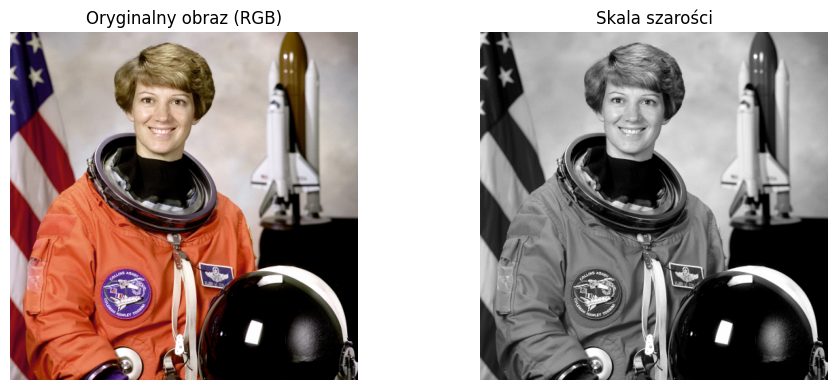

In [ ]:
from skimage import data, color
import matplotlib.pyplot as plt

# Wczytaj przykładowy obraz (RGB)
img = data.astronaut()  # RGB obraz testowy z skimage

# Konwersja do skali szarości
gray = color.rgb2gray(img)  # daje wartości typu float w [0, 1]

# Wyświetlenie
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title("Oryginalny obraz (RGB)")
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Skala szarości")
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


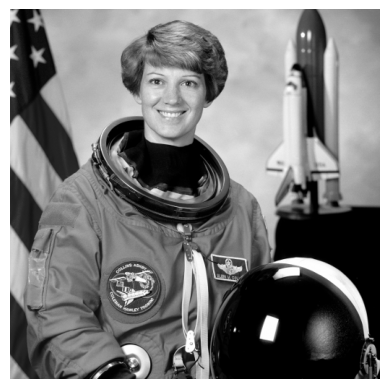

In [ ]:
"""
Uwaga:
color.rgb2gray(img) zwraca obraz w skali szarości, ale jako wartości float w przedziale [0, 1].

Można łatwo zamienić to na uint8, jeśli chcesz:
"""

from skimage import img_as_ubyte
gray_uint8 = img_as_ubyte(gray)

plt.imshow(gray_uint8, cmap='gray')
plt.axis('off')
plt.show()



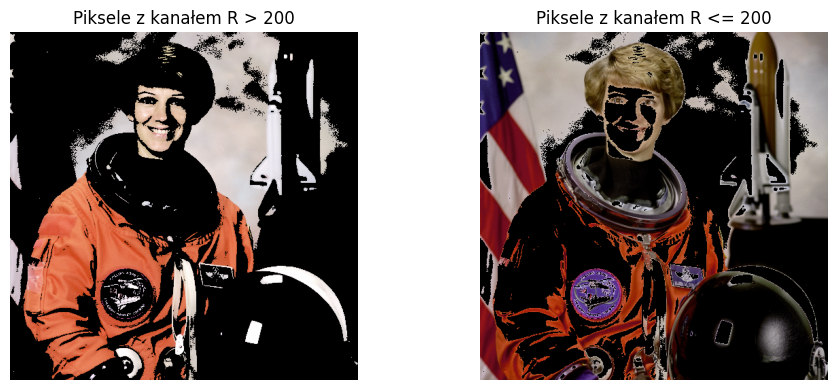

'\nproszę zauważyć, że zawsze będzie biały, bo on się składa z pełnej mieszanki wszystkich\n'

In [ ]:
"""
Możemy teraz zrobić proste filtrowanie, na przykład rozbić obraz względem poziomu koloru R
"""

import numpy as np
import matplotlib.pyplot as plt
from skimage import data

# Załaduj obraz astronauty (RGB)
img_rgb = data.astronaut()

# Tworzymy maskę: True tam, gdzie kanał R > 100
mask = img_rgb[:, :, 0] > 200  # kanał R to [:,:,0]

# Tworzymy nowy obraz — czarny, potem nadpiszemy tylko wybrane piksele
masked_img = np.zeros_like(img_rgb)

# Przypisz oryginalne wartości tylko tam, gdzie R > 200
masked_img[mask] = img_rgb[mask]

# Wyświetlenie
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(masked_img)
plt.title('Piksele z kanałem R > 200')
plt.axis('off')

# Przypisz oryginalne wartości tylko tam, gdzie R < 200
masked_img = np.zeros_like(img_rgb)
masked_img[~mask] = img_rgb[~mask]

plt.subplot(1, 2, 2)
plt.imshow(masked_img)
plt.title('Piksele z kanałem R <= 200')
plt.axis('off')

plt.tight_layout()
plt.show()

"""
proszę zauważyć, że zawsze będzie biały, bo on się składa z pełnej mieszanki wszystkich
"""

### Format YCbCr

**YCbCr** to przestrzeń kolorów, która oddziela składnik **jasności (Y)** od składników **kolorów (Cb i Cr)**. Jest to alternatywa dla RGB, szeroko stosowana w cyfrowej kompresji obrazów (np. JPEG) oraz w telewizji (w standardzie NTSC, PAL).

* **Y**: reprezentuje **jasność** obrazu (luminancję).
* **Cb**: reprezentuje **różnicę** pomiędzy **niebieskim** kanałem a jasnością (Blue chroma).
* **Cr**: reprezentuje **różnicę** pomiędzy **czerwonym** kanałem a jasnością (Red chroma).

####  Jak wygląda konwersja z RGB do YCbCr?

Najczęściej używany wzór do konwersji z RGB do YCbCr (w przestrzeni TV, NTSC) jest następujący:

$$
Y = 0.299 \cdot R + 0.587 \cdot G + 0.114 \cdot B
$$

$$
Cb = -0.1687 \cdot R - 0.3313 \cdot G + 0.5 \cdot B
$$

$$
Cr = 0.5 \cdot R - 0.4187 \cdot G - 0.0813 \cdot B
$$

Po tej konwersji:

* **Y** – zawiera całą informację o jasności obrazu (identyczną do skali szarości).
* **Cb** i **Cr** zawierają różnice kolorów (chrominancję) w stosunku do jasności.

####  Zastosowanie YCbCr:

* W **kompresji obrazu** (np. JPEG) – chrominancję Cb i Cr można subskompresować, ponieważ ludzki wzrok nie jest w stanie zauważyć tak dużych zmian w kolorach, jak w jasności. Z tego powodu **usuwanie szczegółów w Cb i Cr** (np. w JPEG) prowadzi do kompresji obrazu z minimalną utratą jakości.
* W **telewizji cyfrowej i analogowej** – przestrzeń YCbCr jest używana w transmisji sygnału wideo, ponieważ pozwala na lepszą separację jasności i kolorów.


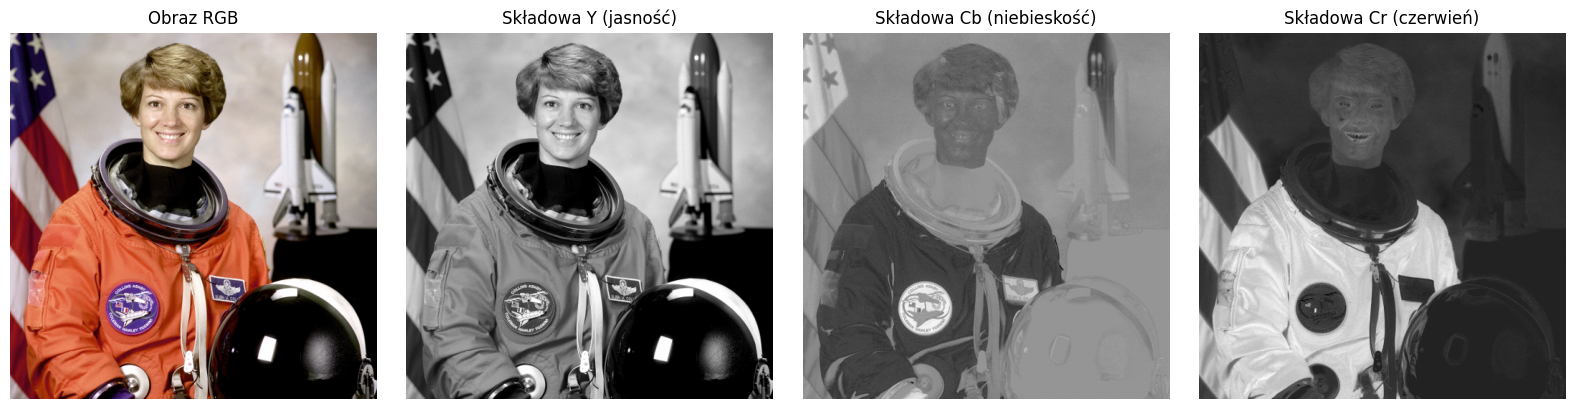

In [ ]:
import matplotlib.pyplot as plt
from skimage import data, color, img_as_float

# Wczytanie przykładowego obrazu RGB (np. astronauta)
image_rgb = img_as_float(data.astronaut())  # wartości w [0, 1]

# Konwersja do YCbCr
image_ycbcr = color.rgb2ycbcr(image_rgb)

# Wydzielenie kanałów
Y = image_ycbcr[:, :, 0]
Cb = image_ycbcr[:, :, 1]
Cr = image_ycbcr[:, :, 2]

# Rysowanie wyników
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
axes[0].imshow(image_rgb)
axes[0].set_title("Obraz RGB")
axes[0].axis("off")

axes[1].imshow(Y, cmap="gray")
axes[1].set_title("Składowa Y (jasność)")
axes[1].axis("off")

axes[2].imshow(Cb, cmap="gray")
axes[2].set_title("Składowa Cb (niebieskość)")
axes[2].axis("off")

axes[3].imshow(Cr, cmap="gray")
axes[3].set_title("Składowa Cr (czerwień)")
axes[3].axis("off")

plt.tight_layout()
plt.show()


### Podsumowanie działania kanałów **Cb** i **Cr** w modelu YCbCr:

#### **1. Kanał Cb (chrominancja niebieska)**

Kanał **Cb** w modelu YCbCr reprezentuje różnicę między intensywnością niebieskiego a jasnością obrazu. Jest to różnica między wartością niebieską (B) a luminancją (Y). Wartość neutralna to **128**, co oznacza brak dominacji niebieskiego.

* **Neutralna wartość Cb (128)**:

  * **Cb = 128**: Wartość neutralna oznacza brak wpływu na niebieski kolor w obrazie, co skutkuje obrazem w odcieniach szarości, jeśli inne kanały są neutralne (Y = 128 i Cr = 128).

* **Wartości Cb**:

  * **Cb > 128**: Zwiększenie wartości Cb powoduje przewagę niebieskiego koloru w obrazie.
  * **Cb < 128**: Zmniejszenie wartości Cb powoduje przesunięcie koloru w stronę żółci (z dominującym ciepłym odcieniem).

#### **2. Kanał Cr (chrominancja czerwona)**

Kanał **Cr** w modelu YCbCr reprezentuje różnicę między intensywnością czerwonego a jasnością obrazu. Jest to różnica między wartością czerwoną (R) a luminancją (Y). Wartość neutralna to **128**, co oznacza brak dominacji czerwonego.

* **Neutralna wartość Cr (128)**:

  * **Cr = 128**: Wartość neutralna oznacza brak wpływu na czerwony kolor w obrazie, co skutkuje obrazem w odcieniach szarości, jeśli inne kanały są neutralne (Y = 128 i Cb = 128).

* **Wartości Cr**:

  * **Cr > 128**: Zwiększenie wartości Cr powoduje przewagę czerwonego koloru w obrazie.
  * **Cr < 128**: Zmniejszenie wartości Cr powoduje przesunięcie koloru w stronę zieleni, gdyż niższe wartości Cr zmniejszają intensywność czerwonego, a zwiększają zielony odcień obrazu.



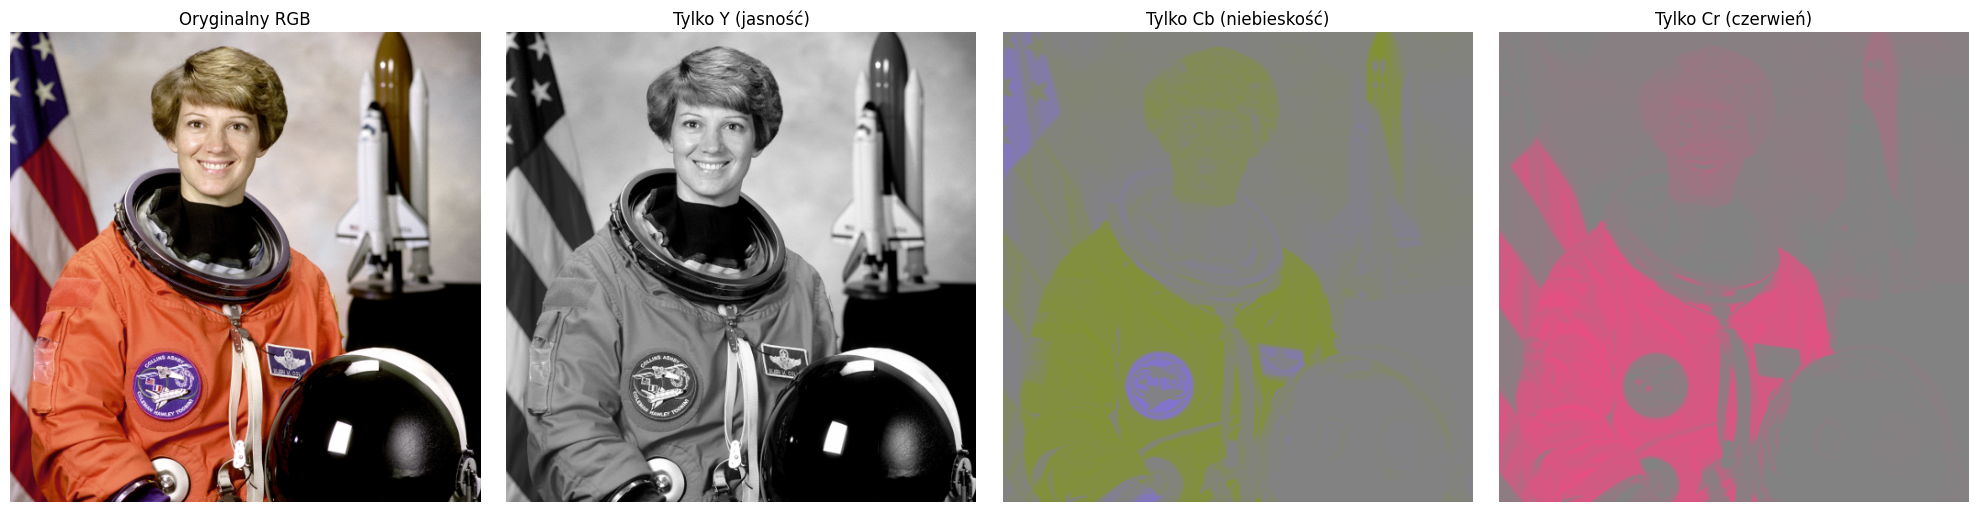

In [ ]:
import matplotlib.pyplot as plt
from skimage import data, color, img_as_float
import numpy as np

# Wczytanie obrazu RGB
image_rgb = img_as_float(data.astronaut())

# Konwersja do YCbCr
image_ycbcr = color.rgb2ycbcr(image_rgb)

# Obraz z tylko Y (jasność)
image_Y = image_ycbcr.copy()
image_Y[:, :, 1] = 128  # neutralne Cb
image_Y[:, :, 2] = 128  # neutralne Cr
image_Yrgb = color.ycbcr2rgb(image_Y)

# Obraz z tylko Cb
image_Cb = image_ycbcr.copy()
image_Cb[:, :, 0] = 128  # neutralne Y
image_Cb[:, :, 2] = 128  # neutralne Cr
image_Cbrgb = color.ycbcr2rgb(image_Cb)

# Obraz z tylko Cr
image_Cr = image_ycbcr.copy()
image_Cr[:, :, 0] = 128  # neutralne Y
image_Cr[:, :, 1] = 128  # neutralne Cb
image_Crrgb = color.ycbcr2rgb(image_Cr)

# Rysowanie
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[0].imshow(image_rgb)
axes[0].set_title("Oryginalny RGB")
axes[0].axis("off")

axes[1].imshow(image_Yrgb)
axes[1].set_title("Tylko Y (jasność)")
axes[1].axis("off")

axes[2].imshow(image_Cbrgb)
axes[2].set_title("Tylko Cb (niebieskość)")
axes[2].axis("off")

axes[3].imshow(image_Crrgb)
axes[3].set_title("Tylko Cr (czerwień)")
axes[3].axis("off")

plt.tight_layout()
plt.show()


#  Wyrównywanie histogramu – idea i wykonanie

**Wyrównywanie histogramu** to technika przetwarzania obrazów mająca na celu poprawę **kontrastu** poprzez **redystrybucję poziomów jasności** w obrazie. Polega na takiej transformacji pikseli, aby histogram jasności był możliwie równomierny – czyli każdy zakres intensywności był reprezentowany w obrazie w zbliżonym stopniu.

---

##  Po co się to robi?

- Obrazy o **niskim kontraście** mają histogramy skupione w wąskim zakresie intensywności (np. tylko ciemne piksele).
- Dzięki wyrównaniu histogramu **więcej szczegółów staje się widocznych** – zwłaszcza w zacienionych lub prześwietlonych obszarach.
- Jest to **automatyczna** metoda poprawy kontrastu, przydatna np. w obrazach satelitarnych, medycznych, nocnych itp.

---

##  Wyprowadzenie

Motywacja z rachunku prawdopodobieństwa -- jeżeli zmienna losowa $X$ ma dystrybuantę $F$, to $F(X)$ ma rozkład jednostajny na odcinku $[0,1]$ (dowód wynika bezpośrednio z definicji dystrybuanty).

1. **Zlicz histogram**: Oblicz ile pikseli ma każdą wartość jasności (np. 0–255 dla 8-bitowego obrazu).

2. **Oblicz dystrybuantę** (CDF – *cumulative distribution function*):
$$
\text{CDF}(i) = \sum_{j=0}^{i} p_j
$$
gdzie $p_j$ to prawdopodobieństwo wystąpienia poziomu jasności $j$ (czyli znormalizowany histogram).

3. **Zastosuj przekształcenie**:
$$
\text{Nowa wartość} = \text{round}((L-1) \cdot \text{CDF}(i))
$$
gdzie $L$ to liczba możliwych poziomów jasności (np. 256).

4. **Zamień piksele** na nowe wartości z przekształconej skali.

---

##  Wizualna intuicja:

- Wyobraź sobie obraz, w którym wszystkie piksele są ciemne (np. w zakresie 0–50).
- Po wyrównaniu histogramu te wartości zostaną rozciągnięte na cały zakres 0–255 – ciemne stają się bardziej zróżnicowane, widać więcej szczegółów.

---

##  Uwaga praktyczna:

- Wyrównywanie histogramu **może powodować przerysowania** (artefakty), jeśli obraz już miał wysoki kontrast.


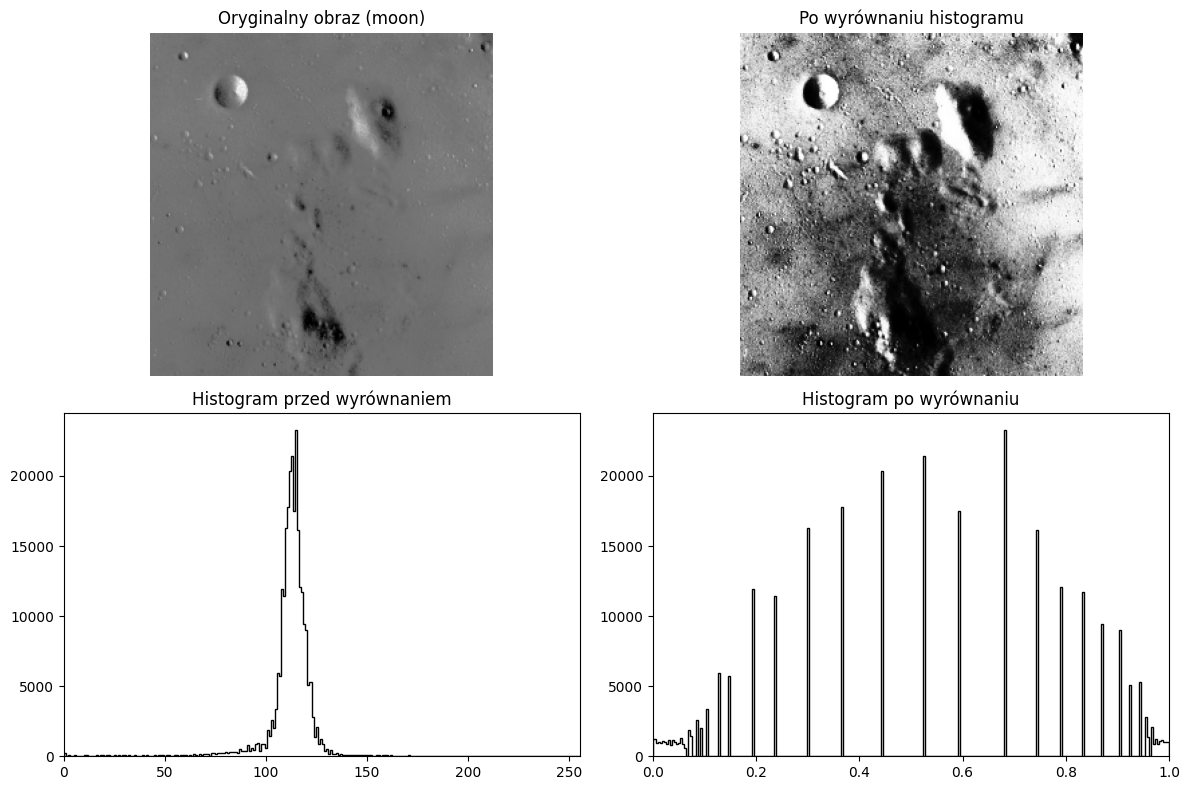

In [ ]:
import matplotlib.pyplot as plt
from skimage import data, exposure

# Wczytanie obrazu Księżyca (już w skali szarości)
image = data.moon()

# Wyrównanie histogramu
image_eq = exposure.equalize_hist(image)

# Rysowanie wyników
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Oryginalny obraz
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Oryginalny obraz (moon)')
axes[0, 0].axis('off')

# Histogram oryginalnego obrazu
axes[1, 0].hist(image.ravel(), bins=256, histtype='step', color='black')
axes[1, 0].set_title('Histogram przed wyrównaniem')
axes[1, 0].set_xlim(0, 255)

# Obraz po wyrównaniu histogramu
axes[0, 1].imshow(image_eq, cmap='gray')
axes[0, 1].set_title('Po wyrównaniu histogramu')
axes[0, 1].axis('off')

# Histogram po wyrównaniu
axes[1, 1].hist(image_eq.ravel(), bins=256, histtype='step', color='black')
axes[1, 1].set_title('Histogram po wyrównaniu')
axes[1, 1].set_xlim(0, 1)

plt.tight_layout()
plt.show()


# Binaryzacja Otsu

Metoda Otsu to klasyczna i bardzo sprytna technika automatycznego progowania obrazu. Czyli mamy zdjęcie w skali szarości, i chcemy zmienić na zdjęcie binarne. Zakłądam tutaj, że mamy jasność w zakresie 0-255.

##  **Cel binaryzacji Otsu**

Znaleźć taki próg jasności `t`, który **podzieli piksele na dwie klasy**:

* klasę tła (`C_0`): piksele o jasności `≤ t`
* klasę obiektów (`C_1`): piksele o jasności `> t`

Tak, aby **maksymalnie rozdzielić** te klasy – czyli zminimalizować ich **wewnętrzną wariancję** (im bardziej jednorodne klasy, tym lepiej).

---

##  **Wzory – krok po kroku**

Zakładamy, że mamy histogram intensywności `p(i)` (prawdopodobieństwo wystąpienia poziomu jasności `i`) dla `i = 0, 1, ..., L-1`.

Dla każdego możliwego progu `t ∈ [0, L-1]`:

### 1. **Prawdopodobieństwa i średnie klas:**
Prawdopodobieństwa:
$$
\omega_0(t) = \sum_{i=0}^t p(i) \quad \text{(waga tła)} \\
\omega_1(t) = \sum_{i=t+1}^{L-1} p(i) = 1 - \omega_0(t)
$$
i średnie
$$
\mu_0(t) = \frac{1}{\omega_0(t)} \sum_{i=0}^t i \cdot p(i) \\
\mu_1(t) = \frac{1}{\omega_1(t)} \sum_{i=t+1}^{L-1} i \cdot p(i)
$$

---

### 3. **Wariancja międzyklasowa (inter-class variance):**

Kluczowy wzór:
$$
\sigma_B^2(t) = \omega_0(t)\omega_1(t)\left[\mu_0(t) - \mu_1(t)\right]^2
$$

Jeśli klasy są dobrze oddzielone (mają inne średnie i duże masy), wariancja międzyklasowa będzie duża. Proszę zauważyć, że gdy albo średnie są blisko, albo któraś klasa ma małą wagę, wartość tego współczynnika będzie mała.

---

### 4. **Algorytm Otsu:**

Szukamy progu `t*`, który maksymalizuje wariancję międzyklasową:

$$
t^* = \arg\max_t \sigma_B^2(t)
$$

* Jeśli histogram obrazu ma **dwa wyraźne piki**, to istnieje idealny punkt podziału między nimi – **metoda Otsu znajdzie go automatycznie**.
* Nie trzeba zakładać konkretnych wartości – tylko że **obraz ma dwie klasy**.

W Pythonie funkcja `filters.threshold_otsu()` z `skimage` wykonuje wszystkie te kroki automatycznie – analizuje histogram i zwraca optymalny próg. Przegląda ona wszystkie możliwe progi (czyli 256 możliwości).


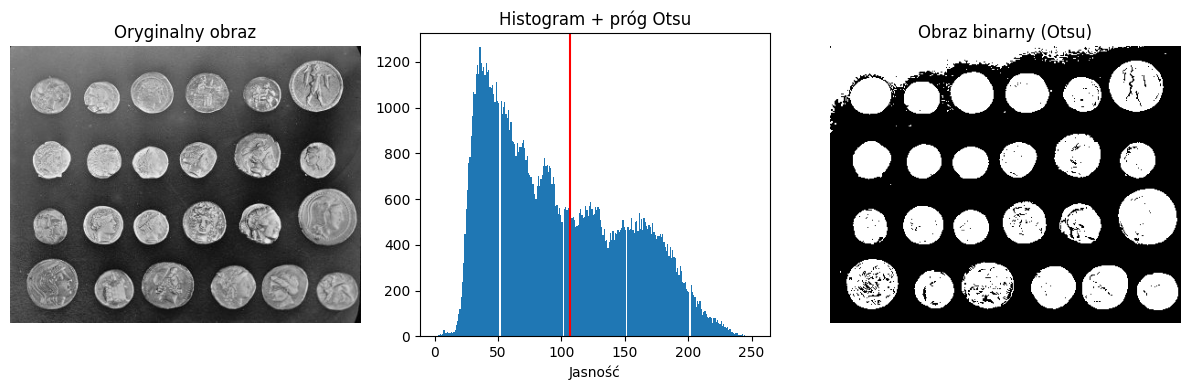

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters, color
from skimage.color import rgb2gray

# Wczytaj obraz i przekształć do skali szarości (jeśli trzeba)
image = data.coins()
gray_image = rgb2gray(image) if image.ndim == 3 else image

# Oblicz próg metodą Otsu
threshold_otsu = filters.threshold_otsu(gray_image)

# Zbinaryzuj obraz
binary_image = gray_image > threshold_otsu

# Wyświetlenie wyników
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Oryginalny obraz")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title(f"Histogram + próg Otsu")
plt.hist(gray_image.ravel(), bins=256)
plt.axvline(threshold_otsu, color='r')
plt.xlabel("Jasność")

plt.subplot(1, 3, 3)
plt.title("Obraz binarny (Otsu)")
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
